In [106]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV


## 1) Data previews

In [107]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2) Data processing

### 2.1 Data Cleaning

**hundling the missing value in  both train and test dataframe**

In [110]:
#check the existing of null value in train dataframe 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
#check the existing of null value in test dataframe 

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [112]:
### hundle missing values in Age columns for both trin and test
train['Age'].fillna(train['Age'].mean(), inplace= True)

test['Age'].fillna(test['Age'].mean(), inplace= True)

/tmp/ipykernel_37/2740545073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace= True)
/tmp/ipykernel_37/2740545073.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [113]:
# hundling missing values in Embarked columns for train dataframe
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_37/3336355980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)


In [114]:
#hundle the missing values in Fare columns for test dataframe
test.Fare.fillna(test.Fare.mean(),inplace=True)

/tmp/ipykernel_37/3058462701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(test.Fare.mean(),inplace=True)


In [115]:
# creating another columns from the cabin columns and fill null value with 'Unknown' for both of Datafrme
train['Deck']=train.Cabin.str[0]
train['Deck'].fillna('Unknown', inplace= True)
train.drop('Cabin', axis=1, inplace=True)

test['Deck']=test.Cabin.str[0]
test['Deck'].fillna('Unknown', inplace= True)
test.drop('Cabin', axis=1, inplace=True)

/tmp/ipykernel_37/189532593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Deck'].fillna('Unknown', inplace= True)
/tmp/ipykernel_37/189532593.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

### 2.2) Data Transforming

**Encode columns that has categorical values for both Dataframe**

In [116]:
train['Sex'] = train['Sex'].astype(str)
train['Embarked'] = train['Embarked'].astype(str)
train['Deck'] = train['Deck'].astype(str)

test['Sex'] = test['Sex'].astype(str)
test['Embarked'] = test['Embarked'].astype(str)
test['Deck'] = test['Deck'].astype(str)

categories1=[['female', 'male']]
categories2=[['C','Q','S']]
categories3=[['Unknown','A','B','C','D','E','F','G','T']]
encoder1=OrdinalEncoder(categories=categories1,dtype=float)
encoder2=OrdinalEncoder(categories=categories2,dtype=float)
encoder3=OrdinalEncoder(categories=categories3,dtype=float)

train['Sex']=encoder1.fit_transform(train[['Sex']])
train['Embarked']=encoder2.fit_transform(train[['Embarked']])
train['Deck']=encoder3.fit_transform(train[['Deck']])

test['Sex']=encoder1.fit_transform(test[['Sex']])
test['Embarked']=encoder2.fit_transform(test[['Embarked']])
test['Deck']=encoder3.fit_transform(test[['Deck']])

**scaling the Age and Fare columns**

In [117]:
scaler = MinMaxScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']] = scaler.fit_transform(test[['Age', 'Fare']])


### 2.3) Feature Engineering

**Creating new feature for SibSp and Parch columns**

In [118]:
train['Family']=train.Parch+train.SibSp+1
test['Family']=test.Parch+test.SibSp+1

## 3) Data Analysis

### 3.1) Data Distribution

**some feature behavior**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of females and male')

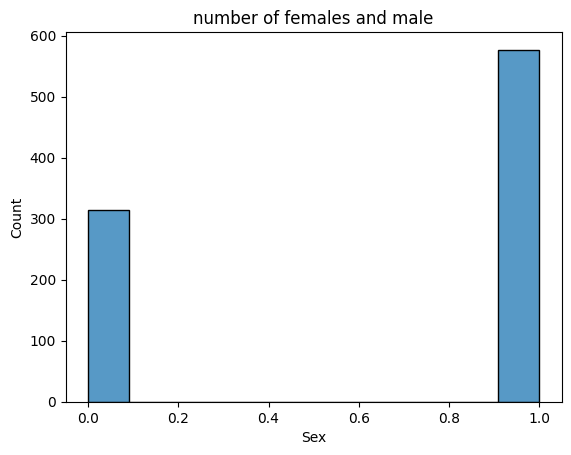

In [119]:
sns.histplot(train['Sex'])
plt.title('number of females and male')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of passenger in each class')

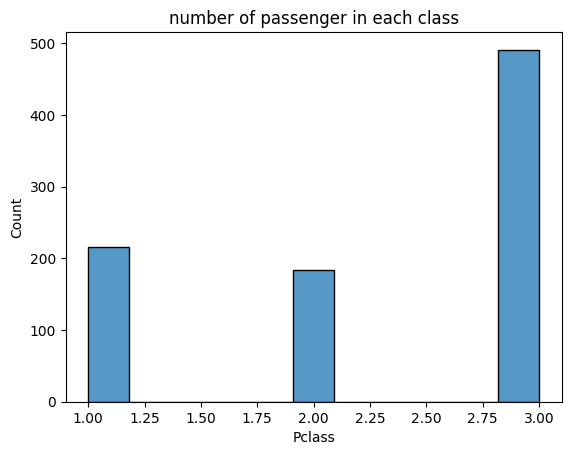

In [120]:
sns.histplot(train['Pclass'])
plt.title('number of passenger in each class')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of passenger in each Embarked')

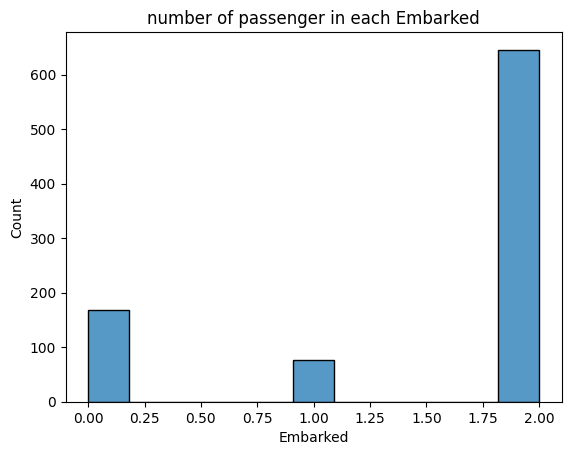

In [121]:
sns.histplot(train['Embarked'])
plt.title('number of passenger in each Embarked')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of passenger in each Deck')

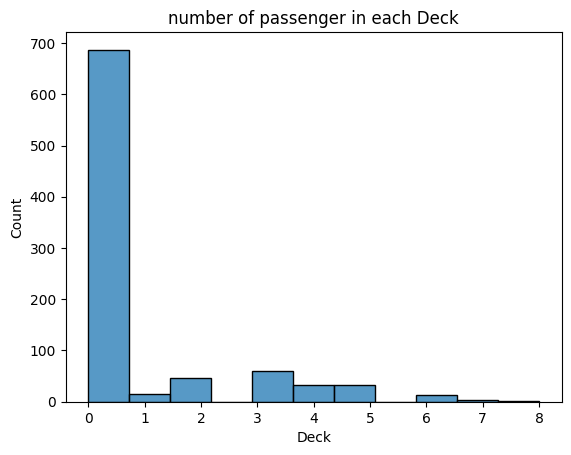

In [122]:
sns.histplot(train['Deck'])
plt.title('number of passenger in each Deck')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'number of passenger in each Family number')

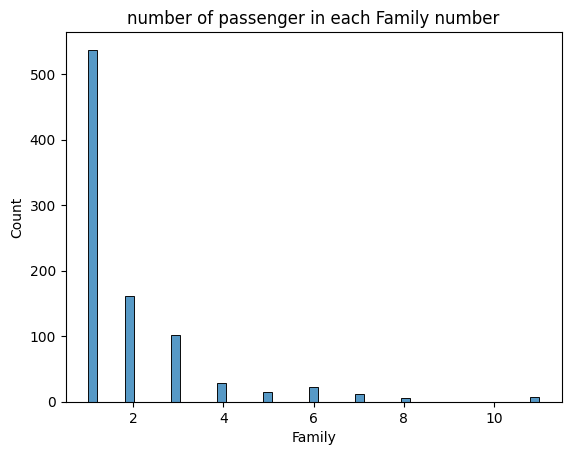

In [123]:
sns.histplot(train['Family'])
plt.title('number of passenger in each Family number')

**Relation between Feature and Target**

Text(0.5, 1.0, 'Relation between number of passenger in Sex and Survived')

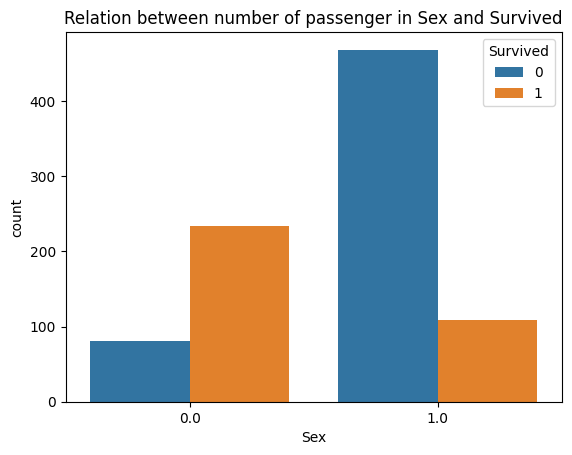

In [124]:
sns.countplot(x='Sex', hue='Survived',data=train)
plt.title('Relation between number of passenger in Sex and Survived')

Text(0.5, 1.0, 'Relation between number of passenger in Pclass and Survived')

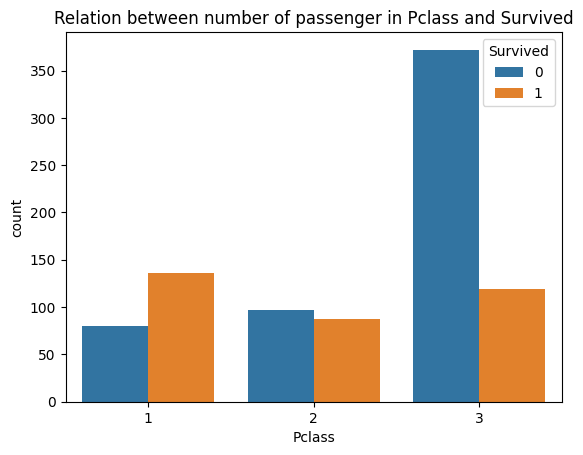

In [125]:
sns.countplot(x='Pclass', hue='Survived',data=train)
plt.title('Relation between number of passenger in Pclass and Survived')

Text(0.5, 1.0, 'Relation between number of passenger in Embarked and Survived')

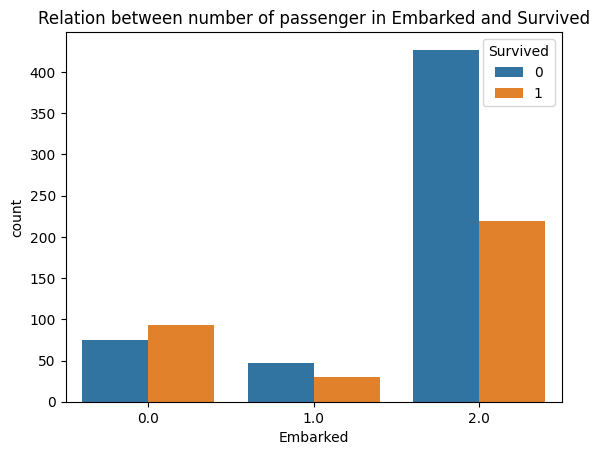

In [126]:
sns.countplot(x='Embarked', hue='Survived',data=train)
plt.title('Relation between number of passenger in Embarked and Survived')

Text(0.5, 1.0, 'Relation between number of passenger in Deck and Survived')

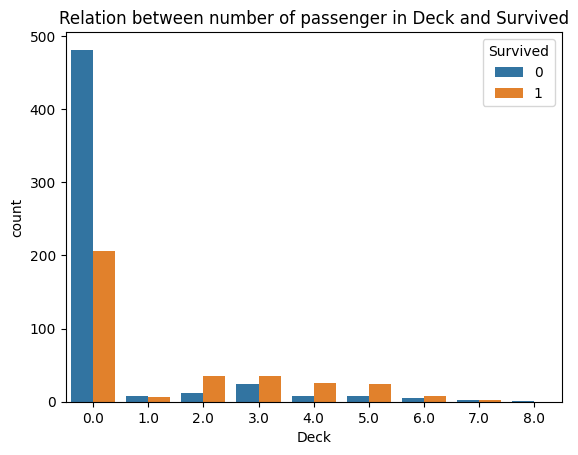

In [127]:
sns.countplot(x='Deck', hue='Survived',data=train)
plt.title('Relation between number of passenger in Deck and Survived')

Text(0.5, 1.0, 'Relation between number of passenger in Family and Survived')

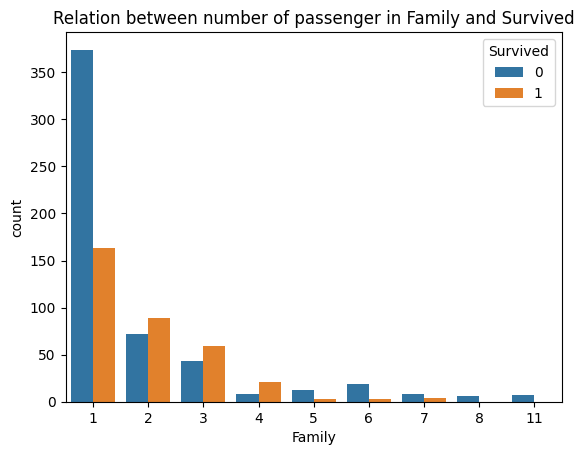

In [128]:
sns.countplot(x='Family', hue='Survived',data=train)
plt.title('Relation between number of passenger in Family and Survived')

<Axes: xlabel='Age', ylabel='Fare'>

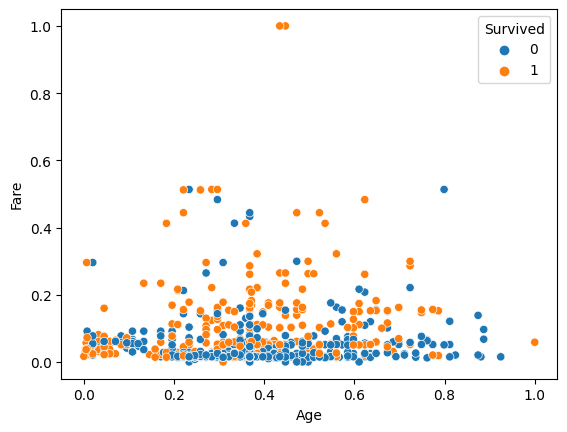

In [129]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)

In [130]:
train.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived       1.000000
Deck           0.287944
Fare           0.257307
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

## 4) Data Modeling

In [131]:
#data spliting
feature=['Sex', 'Pclass', 'Deck', 'Fare','Embarked']
x=train[feature]
y=train['Survived']
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


In [132]:
#check the model accuracy to select
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    
    y_pred_test=model.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_test)

    print(name+' acc_test accuracy: '+str(acc_val))
    print(name+' acc_train accuracy: '+str(acc_train))
    print(name+' Gap between val accuracy and train accuracy : '+str(acc_train-acc_val))
    print()

LogisticRegression acc_test accuracy: 0.7988826815642458
LogisticRegression acc_train accuracy: 0.7865168539325843
LogisticRegression Gap between val accuracy and train accuracy : -0.012365827631661497

Random Forest acc_test accuracy: 0.8324022346368715
Random Forest acc_train accuracy: 0.9199438202247191
Random Forest Gap between val accuracy and train accuracy : 0.08754158558784764

KNN acc_test accuracy: 0.7988826815642458
KNN acc_train accuracy: 0.8356741573033708
KNN Gap between val accuracy and train accuracy : 0.036791475739125



In [133]:
#selected  model
model= RandomForestClassifier(random_state=42)

In [134]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [135]:
# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [136]:
# Fit on training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [137]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(x_val)

In [138]:
accuracy_score(y_val,y_pred)

0.8324022346368715

In [139]:
prediction=best_model.predict(test[feature])
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [140]:
output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': prediction})
output.to_csv('submission.csv', index=False)